In [41]:
# -*-coding:utf-8 -*-
# Time: 2024/12/10
# Author: lcheng1334

import os
import matplotlib.pyplot as plt

path = "/home/lc/code/datasets/severstal-steel-defect-detection"# File: demo.ipynb

os.listdir(path)

['train.csv', 'test_images', 'sample_submission.csv', 'train_images']

In [42]:
# _*_ coding: utf-8 _*_
#
# Copyright (C) 2024 - 2024 Zhijian Zhu, All Rights Reserved 
#
# @Time    : 2024/12/9 下午4:02
# @Author  : Zhijian Zhu
# @File    : mask_rle.py
# @IDE     : PyCharm

import numpy as np

def mask2rle(img):
    '''
    img: numpy array, 1 - mask, 0 - background
    Returns run length as string formated
    '''
    pixels= img.T.flatten()
    pixels = np.concatenate([[0], pixels, [0]])
    runs = np.where(pixels[1:] != pixels[:-1])[0] + 1
    runs[1::2] -= runs[::2]
    return ' '.join(str(x) for x in runs)

def rle2mask(mask_rle, shape=(1600,256)):
    '''
    mask_rle: run-length as string formated (start length)
    shape: (width,height) of array to return
    Returns numpy array, 1 - mask, 0 - background

    '''
    s = mask_rle.split()
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
    starts -= 1
    ends = starts + lengths
    img = np.zeros(shape[0]*shape[1], dtype=np.uint8)
    for lo, hi in zip(starts, ends):
        img[lo:hi] = 1
    return img.reshape(shape).T

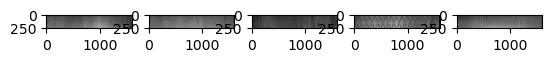

In [ ]:
train_path = os.path.join(path, 'train_images')
train_lst = sorted(os.listdir(train_path))
fig, axes = plt.subplots(1, 5)
for i in range(5):
    image = plt.imread(os.path.join(train_path, train_lst[i]))
    axes[i].imshow(image)

plt.show()

In [ ]:
import pandas as pd


train_csv = os.path.join(path, 'train.csv')
pd.read_csv(train_csv).head()	

,ImageId,ClassId,EncodedPixels
0,0002cc93b.jpg,1,29102 12 29346 24 29602 24 29858 24 30114 24 3...
1,0007a71bf.jpg,3,18661 28 18863 82 19091 110 19347 110 19603 11...
2,000a4bcdd.jpg,1,37607 3 37858 8 38108 14 38359 20 38610 25 388...
3,000f6bf48.jpg,4,131973 1 132228 4 132483 6 132738 8 132993 11 ...
4,0014fce06.jpg,3,229501 11 229741 33 229981 55 230221 77 230468...


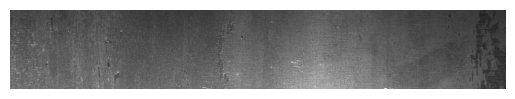

In [78]:
image_path = os.path.join(train_path, "0002cc93b.jpg")
image = plt.imread(image_path)
plt.imshow(image)
plt.axis("off")
plt.savefig("train_image.png", bbox_inches='tight', pad_inches=0)

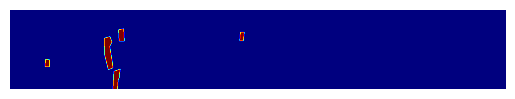

In [79]:
csv = pd.read_csv(train_csv)
rle = csv[csv["ImageId"] == "0002cc93b.jpg"]["EncodedPixels"].iloc[0]
mask = rle2mask(rle)
# image = plt.imread(image_path)
plt.imshow(mask, cmap='jet')
plt.axis("off")
plt.savefig("mask.png", bbox_inches='tight', pad_inches=0)

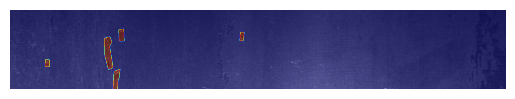

In [80]:
csv = pd.read_csv(train_csv)
rle = csv[csv["ImageId"] == "0002cc93b.jpg"]["EncodedPixels"].iloc[0]
mask = rle2mask(rle)
# image = plt.imread(image_path)
plt.imshow(image)
plt.imshow(mask, alpha=0.5, cmap='jet')
plt.axis("off")
plt.savefig("train_mask_image.png", bbox_inches='tight', pad_inches=0)

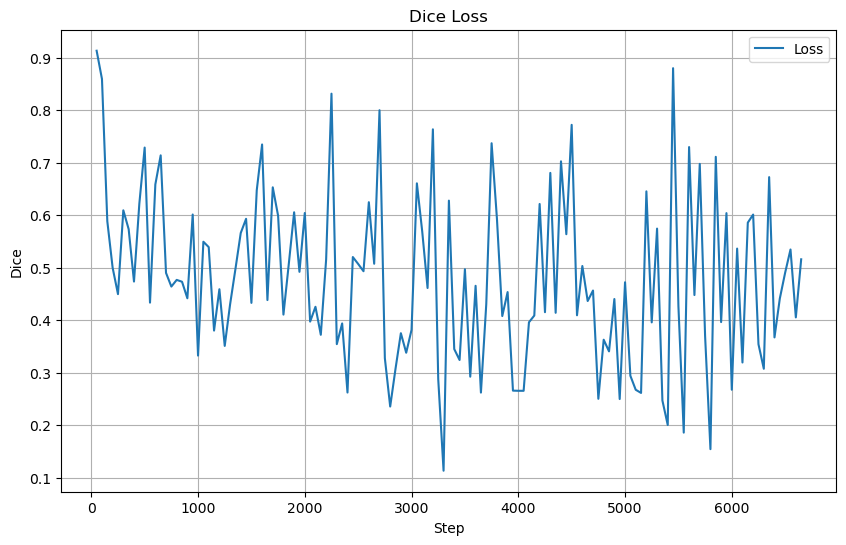

In [90]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取 CSV 文件
csv_file = '/home/lc/code/steel_defect_detection/train_log_pic/run-logs_log_pl-tag-train_loss_dice.csv'  # 替换为实际 CSV 文件路径
data = pd.read_csv(csv_file)

# 绘制训练曲线
plt.figure(figsize=(10, 6))
plt.plot(data['Step'], data['Value'], label='Loss')

# 设置图形标题和标签
plt.title('Dice Loss')
plt.xlabel('Step')
plt.ylabel('Dice')

# 显示网格和图例
plt.grid(True)
plt.legend()

# 显示图形
plt.show()


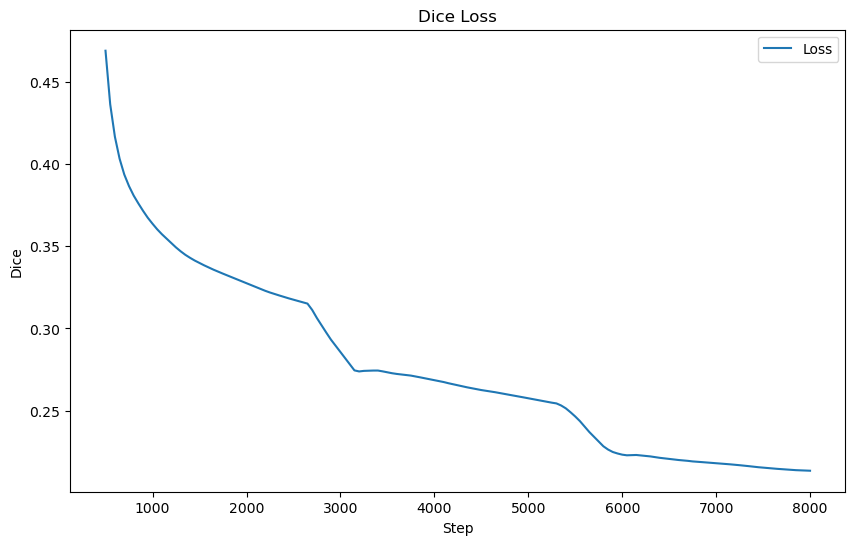

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 读取原始的 CSV 文件
csv_file = "'/home/lc/code/steel_defect_detection/train_log_pic/run-logs_log_pl-tag-train_loss_dice.csv'"  # 替换为实际 CSV 文件路径
data = pd.read_csv(csv_file)

# 进行平滑处理，使用 pandas 的 rolling mean
window_size = 10  # 平滑窗口大小，可以根据需要调整
data['Value'] = data['Value'].rolling(window=window_size).mean()

# 将平滑后的数据保存为新的 CSV 文件
# data.to_csv('smoothed_training_curve.csv', index=False)

# 可视化原始数据和平滑后的数据
plt.figure(figsize=(10, 6))
# plt.plot(data['Step'], data['Value'], label='Original', alpha=0.6)
plt.plot(data['Step'], data['Value'], label='Loss')
plt.title('Dice Loss')
plt.xlabel('Step')
plt.ylabel('Dice')
plt.legend()
# plt.savefig("train.png")
plt.show()


In [112]:
from tensorborad_plt import csv_plot, smooth_plot

ImportError: cannot import name 'smooth_plot' from 'tensorborad_plt' (/home/lc/code/steel_defect_detection/tensorborad_plt.py)

In [4]:
import torch
from torch import nn
import torchmetrics

loss = nn.BCEWithLogitsLoss()
outputs = torch.tensor([0.2, -1.3, 2.1])  # logits
labels = torch.tensor([1, 0, 1]).float()  # 必须是 float 类型
computed_loss = loss(outputs, labels)


accuracy = torchmetrics.Accuracy(task="binary")
outputs = torch.tensor([0.8, 0.2, 0.6])  # logits 或概率
labels = torch.tensor([1, 0, 1]).int()   # 必须是 int 类型
accuracy.update(outputs, labels)

print(computed_loss)
print(accuracy.compute())

tensor(0.3182)
tensor(1.)
